In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
predictions_df = pd.read_csv("predictions.csv")

In [3]:
display(predictions_df)

,groundtruth,knn,knn_bw,knn_pca,knn_bw_pca,lr,lr_bw,lr_pca,lr_bw_pca,rf,rf_bw,rf_pca,rf_bw_pca
0,airplane,airplane,airplane,airplane,ship,airplane,ship,airplane,ship,ship,ship,airplane,ship
1,airplane,airplane,cat,airplane,cat,ship,cat,ship,cat,ship,airplane,airplane,frog
2,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,bird,airplane
3,airplane,truck,deer,truck,deer,bird,airplane,bird,airplane,horse,horse,bird,truck
4,airplane,airplane,ship,airplane,ship,airplane,cat,airplane,frog,airplane,bird,ship,deer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,truck,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,airplane,truck,airplane
9996,truck,ship,ship,ship,ship,truck,truck,truck,truck,ship,ship,truck,ship
9997,truck,truck,truck,truck,truck,truck,truck,truck,truck,truck,truck,truck,truck
9998,truck,frog,deer,frog,deer,automobile,automobile,automobile,automobile,truck,truck,automobile,automobile


In [4]:
models_name = list(predictions_df.columns)
models_name.remove("groundtruth")

In [5]:
metrics_df = dict()
for m in models_name:
    # Compute metrics for each model
    y_true = predictions_df["groundtruth"]
    y_pred = predictions_df[m]
    accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
    precision = precision_score(y_true=y_true, y_pred=y_pred, average="macro")
    recall = recall_score(y_true=y_true, y_pred=y_pred, average="macro")
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average="macro")
    series = pd.Series(name=m,
                       index=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                       data=[accuracy, precision, recall, f1])
    metrics_df[m] = series
metrics_df = pd.DataFrame(metrics_df)

In [6]:
display(metrics_df)

,knn,knn_bw,knn_pca,knn_bw_pca,lr,lr_bw,lr_pca,lr_bw_pca,rf,rf_bw,rf_pca,rf_bw_pca
accuracy,0.357300,0.309600,0.381100,0.336800,0.397900,0.277600,0.406200,0.305300,0.467400,0.413900,0.433800,0.372500
precision_macro,0.433596,0.380412,0.458007,0.405151,0.395960,0.271731,0.401121,0.299176,0.462624,0.410471,0.428686,0.369821
recall_macro,0.357300,0.309600,0.381100,0.336800,0.397900,0.277600,0.406200,0.305300,0.467400,0.413900,0.433800,0.372500
f1_macro,0.348712,0.305312,0.374606,0.333548,0.396352,0.273629,0.402274,0.300276,0.463454,0.410695,0.429741,0.369893


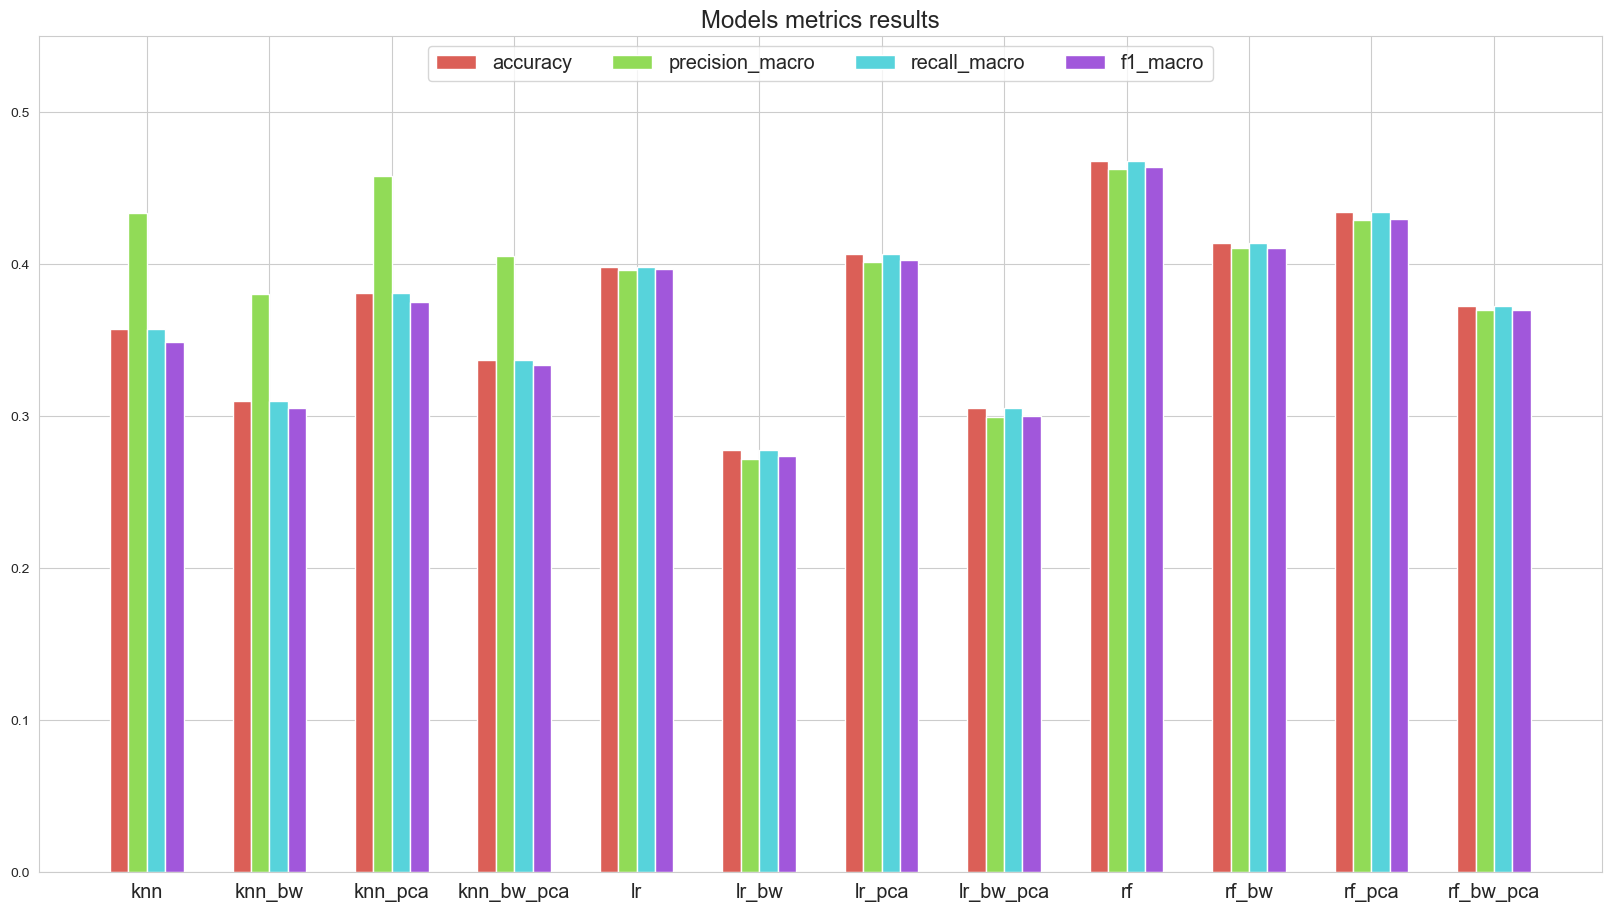

In [7]:
sns.set_style("whitegrid")
palette = sns.color_palette("hls", 4)
sns.set_palette(palette)

metrics_dict = {metric: list(metrics_df.T[metric]) for metric in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]}

x = np.arange(len(models_name))
width = 0.15
multiplier = -0.5

fig, ax = plt.subplots(layout="constrained", figsize=(16, 9))

for metric, value in metrics_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=metric)
    #ax.bar_label(rects, padding=4)
    multiplier = multiplier + 1

ax.set_title("Models metrics results", fontsize="xx-large")
ax.set_xticks(x + width, models_name, fontsize="x-large")
ax.legend(loc="upper center", ncol=4, fontsize="x-large")
ax.set_ylim(0, 0.55)
plt.show()